# 📈 Stock Data Analysis

In [1]:
import sys
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
# Adjust the path to point to your scripts folder relative to the notebook
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

Importing Libraries

In [2]:
from scripts.data_loader import load_data
from scripts.preprocessing import Preprocessor
from scripts.plotting import PlotUtils
from scripts.text_analysis import TextAnalyzer


Loading dataset

In [3]:
df = load_data('/Users/elbethelzewdie/Documents/stock-challenge-week1/stock-challenge-week1/data/raw_analyst_ratings.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [4]:
# Display first 5 rows
df.head(5)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [5]:
# Display last 5 rows
df.tail(5)

,Unnamed: 0,headline,url,publisher,date,stock
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX
1407327,1413848,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,2011-05-12 00:00:00,ZX


In [6]:
# Check for missing values
df.isna().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [7]:
# Drop unnecessary columns
df = df.drop(columns=[col for col in ['url', 'Unnamed: 0'] if col in df.columns])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1407328 non-null  object
 1   publisher  1407328 non-null  object
 2   date       1407328 non-null  object
 3   stock      1407328 non-null  object
dtypes: object(4)
memory usage: 42.9+ MB


## Descriptive Statistics

Word based headline count

In [8]:
# Add headline length feature
df['headline_len_words'] = df['headline'].str.split().str.len()

In [9]:
# Add headline length feature
df['headline_len_words']

0           7
1           7
2           5
3           7
4          14
           ..
1407323     7
1407324     7
1407325     8
1407326     8
1407327    14
Name: headline_len_words, Length: 1407328, dtype: int64

In [10]:
df['headline_len_words'].describe().apply(lambda x: format(x, '.2f'))


count    1407328.00
mean          11.42
std            6.35
min            1.00
25%            7.00
50%           10.00
75%           13.00
max           77.00
Name: headline_len_words, dtype: object

In [11]:
# Create PlotUtils instance
plotter = PlotUtils(df)

In [12]:
print(df.columns)


Index(['headline', 'publisher', 'date', 'stock', 'headline_len_words'], dtype='object')


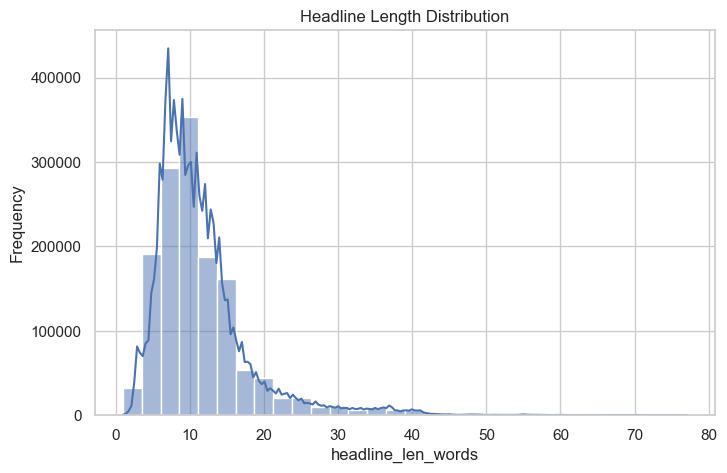

In [13]:
# Plot headline length distribution

plotter.histogram('headline_len_words', bins=30, title='Headline Length Distribution')



Handling Outliers

In [14]:
Q1 = df['headline_len_words'].quantile(0.25)
Q3 = df['headline_len_words'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['headline_len_words'] < lower_bound) |
              (df['headline_len_words'] > upper_bound)]

outliers[['headline', 'headline_len_words']]

,headline,headline_len_words
20,Shares of several healthcare companies are tra...,29
21,Shares of several healthcare companies are tra...,31
26,Shares of several companies in the auto dealer...,39
27,Shares of several healthcare companies are tra...,34
30,Int'l. Air Transport Authority Chief Economist...,27
...,...,...
1406776,UPDATE: Zumiez Raises Q4 EPS Guidance from $0....,24
1406787,Zumiez Inc. Reports Q3 EPS of GAAP $0.54 Which...,23
1406828,UPDATE: Zumiez Inc. Raises Q2 EPS Guidance fro...,25
1407266,Chinese Nano-Cap Momentum Stocks Sharply Highe...,38


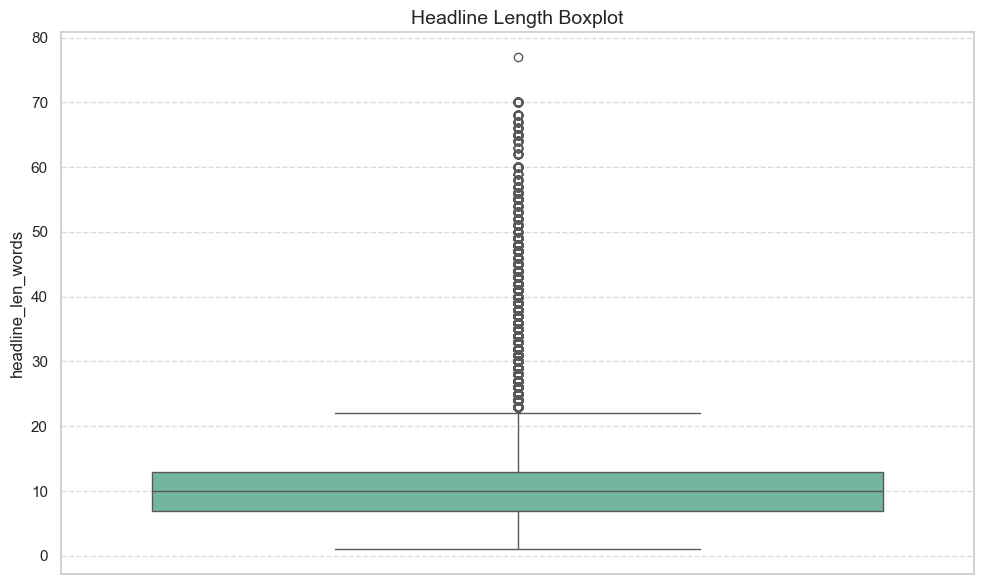

In [15]:
plotter.boxplot('headline_len_words', title='Headline Length Boxplot')

In [16]:
df_no_outliers = df[(df['headline_len_words'] >= lower_bound) &
                    (df['headline_len_words'] <= upper_bound)]

In [17]:
plotter_no_outliers = PlotUtils(df_no_outliers)


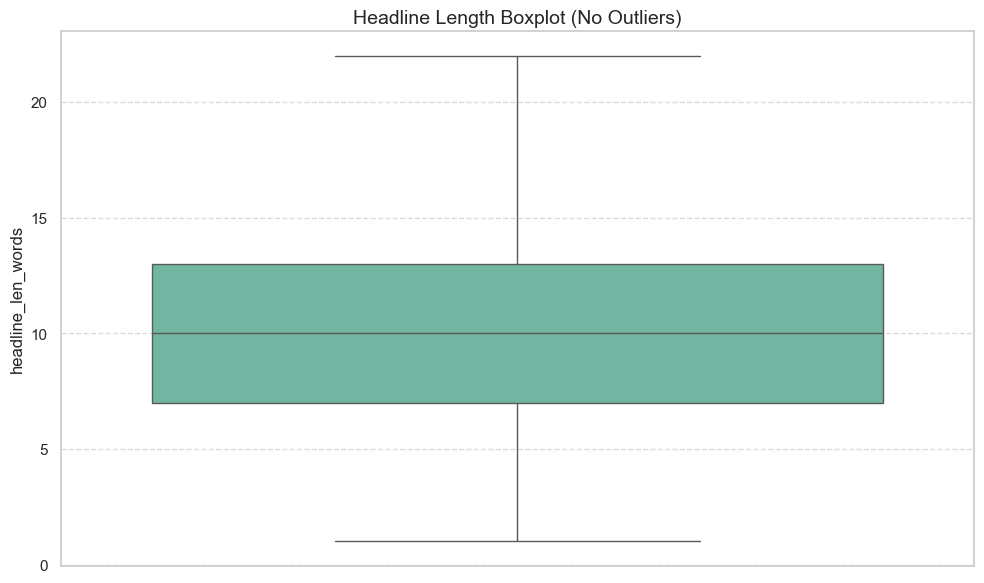

In [18]:
plotter_no_outliers.boxplot('headline_len_words', title='Headline Length Boxplot (No Outliers)')

### Stock column analysis

The stock column contains 6196 unique names and these are the top 10 stocks based on frequency. 

In [19]:
# Unique stocks
print("\nUnique Stocks:", df_no_outliers['stock'].nunique())

# Top 10 most frequent stocks
print("\nTop 10 Stocks by Frequency:")
print(df_no_outliers['stock'].value_counts().head(10))


Unique Stocks: 6196

Top 10 Stocks by Frequency:
stock
MRK     3086
MS      3060
EBAY    2888
M       2869
NVDA    2845
MU      2841
VZ      2800
JNJ     2728
NFLX    2727
DAL     2706
Name: count, dtype: int64


## Text Analysis

### Preprocessing the Headline Column




In [21]:
#  load text analysis module
prep = Preprocessor(language='english', remove_numbers=True)
df_clean = prep.apply_to_dataframe(df_no_outliers, inplace=False)


In [22]:
len(df_clean)

1325325

In [23]:
print(df_clean.columns)

Index(['headline', 'publisher', 'date', 'stock', 'headline_len_words',
       'processed_headline', 'processed_headline_str'],
      dtype='object')


In [24]:
text_analyzer = TextAnalyzer(df_clean)

## Top Keywords in the Headline Column

In [25]:
text_analyzer.top_keywords(10, text_column="processed_headline")


[('stocks', 155285),
 ('vs', 151264),
 ('est', 130749),
 ('eps', 122281),
 ('reports', 103896),
 ('update', 85189),
 ('market', 83501),
 ('earnings', 80918),
 ('top', 77358),
 ('shares', 76579)]

## Top 10 Phrases


In [26]:
text_analyzer.top_ngrams(10, text_column="processed_headline", ngram_range= (2,3), language = "english" )

[('vs est', 74895),
 ('eps vs', 67520),
 ('eps vs est', 58705),
 ('price target', 45715),
 ('stocks moving', 39963),
 ('market update', 33079),
 ('earnings scheduled', 31843),
 ('initiates coverage', 28919),
 ('raises pt', 27211),
 ('premarket session', 21657)]

## Topic modeling

In [27]:
from gensim import corpora, models

# Create dictionary and corpus
dictionary = corpora.Dictionary(df_clean['processed_headline'])
corpus = [dictionary.doc2bow(text) for text in df_clean['processed_headline']]

# Train LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Print topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

Topic 0: 0.099*"vs" + 0.083*"est" + 0.072*"eps" + 0.067*"reports" + 0.057*"sales" + 0.024*"sees" + 0.024*"q4" + 0.023*"q2" + 0.023*"q1" + 0.022*"estimate"
Topic 1: 0.038*"pt" + 0.029*"buy" + 0.028*"raises" + 0.027*"price" + 0.027*"maintains" + 0.026*"target" + 0.020*"initiates" + 0.019*"announces" + 0.019*"neutral" + 0.019*"downgrades"
Topic 2: 0.036*"top" + 0.036*"earnings" + 0.028*"benzingas" + 0.026*"market" + 0.023*"stocks" + 0.017*"watch" + 0.015*"scheduled" + 0.013*"etf" + 0.011*"downgrades" + 0.011*"upgrades"
Topic 3: 0.029*"stocks" + 0.024*"session" + 0.024*"moving" + 0.023*"premarket" + 0.017*"us" + 0.016*"biggest" + 0.015*"movers" + 0.014*"midday" + 0.011*"biotech" + 0.011*"western"
Topic 4: 0.025*"shares" + 0.020*"update" + 0.017*"etfs" + 0.015*"stocks" + 0.012*"says" + 0.010*"market" + 0.009*"sector" + 0.009*"52week" + 0.007*"energy" + 0.007*"higher"


## Publisher Analysis

### Top 10 Publishers

In [28]:
# counts the number of publisher 
publisher_counts = df_clean['publisher'].value_counts().head(10)
print(publisher_counts)

publisher
Paul Quintaro        212669
Lisa Levin           186774
Benzinga Newsdesk    110826
Charles Gross         90273
Monica Gerson         82121
Eddie Staley          54985
Hal Lindon            44598
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        27935
Name: count, dtype: int64


In [29]:
top10 = publisher_counts.reset_index()
top10.columns = ['publisher', 'publisher_counts']

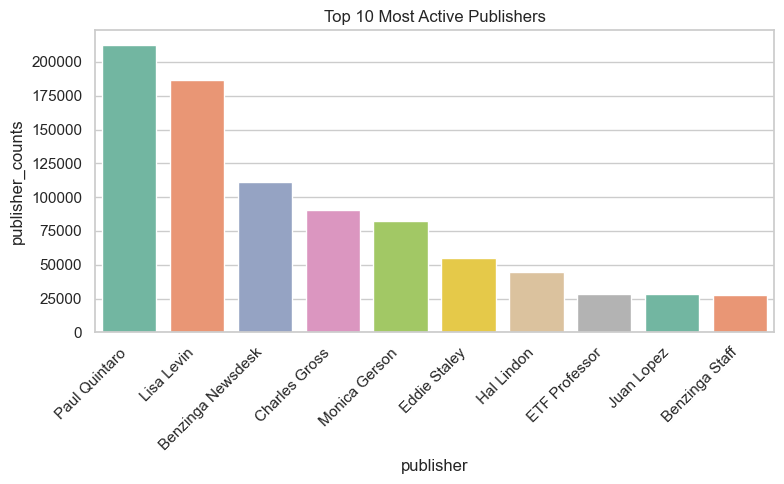

In [30]:
plot_utils_bar = PlotUtils(top10)
plot_utils_bar.bar(
    x_col='publisher',
    y_col='publisher_counts',
    title='Top 10 Most Active Publishers'
)

### Top publishers and stocks 

In [31]:
# Top publishers and stocks
top5_publishers = publisher_counts.head(5).index
for pub in top5_publishers:
    print(f"\nPublisher: {pub}")
    print(df_clean[df_clean['publisher'] == pub]['stock'].value_counts().head(10))



Publisher: Paul Quintaro
stock
XRT     522
AGN     506
JCP     504
EBAY    498
BBRY    487
JNJ     460
P       449
VZ      445
QCOM    441
MRK     440
Name: count, dtype: int64

Publisher: Lisa Levin
stock
GPRO    523
MU      421
NVDA    357
PCG     336
CHK     311
BBBY    272
NVAX    271
ADBE    267
RH      265
BBW     265
Name: count, dtype: int64

Publisher: Benzinga Newsdesk
stock
EWU      671
TSLA     503
FXI      456
EWW      449
RSX      431
GOOGL    379
NFLX     329
PCG      326
GOOG     312
EWC      279
Name: count, dtype: int64

Publisher: Charles Gross
stock
GREK    622
NBG     565
BBRY    480
AZN     473
NVS     423
QCOM    414
EWU     406
EWI     400
MU      397
BABA    397
Name: count, dtype: int64

Publisher: Monica Gerson
stock
AA      216
MS      199
GPS     198
SNDK    198
M       196
MU      195
NTAP    188
ADBE    179
DAL     176
URBN    176
Name: count, dtype: int64


### Email-like publisher names

In [32]:
df_clean['publisher_domain'] = df_clean['publisher'].str.extract(r'@([\w\.-]+)$')

# Count articles per domain
domain_counts = df_clean['publisher_domain'].value_counts().head(10)
print(domain_counts)


publisher_domain
benzinga.com              6274
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


In [33]:
domain = domain_counts.reset_index()
domain.columns = ['publisher_domain', 'domain_counts']

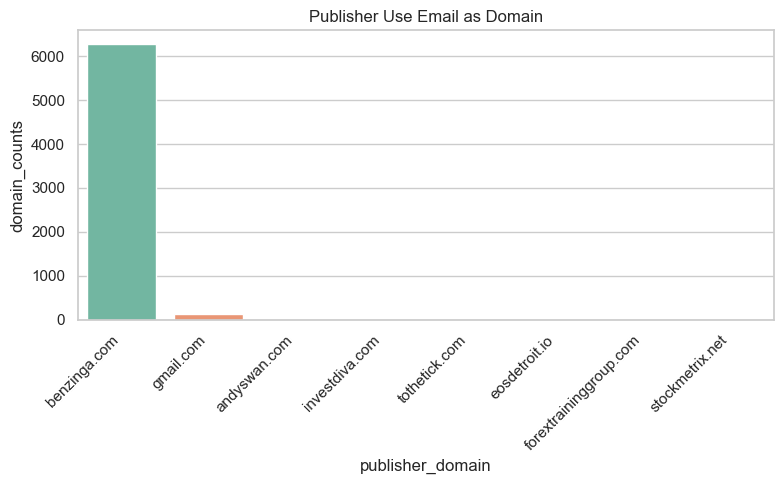

In [34]:
plot_utils_bar = PlotUtils(domain)
plot_utils_bar.bar(
    x_col='publisher_domain',
    y_col='domain_counts',
    title='Publisher Use Email as Domain',
)

## Differences in the Type of News Reported

### 1. By Stock Coverage

In [35]:
stock_by_publisher = df_clean.groupby(['publisher', 'stock'])['headline'].count().unstack(fill_value=0)
print(stock_by_publisher)

stock                        A  AA  AAC  AADR  AAL  AAMC  AAME  AAN  AAOI  \
publisher                                                                   
47ertrends                   0   0    0     0    0     0     0    0     0   
AARP                         0   0    0     0    0     0     0    0     0   
ABNNewswire                  0   0    0     0    0     0     0    0     0   
Aakin                        0   0    0     0    0     0     0    0     0   
Aaron Jackson.Ed             0   0    0     0    0     0     0    0     0   
...                         ..  ..  ...   ...  ...   ...   ...  ...   ...   
vic@forextraininggroup.com   0   0    0     0    0     0     0    0     0   
vishwanath@benzinga.com      5   1    0     0    1     0     0    2     1   
vivek.proactive@gmail.com    1   0    0     0    1     0     0    0     0   
wallstreet1928               0   0    0     0    0     0     0    0     0   
webmaster                   54  84    0     0    0     0     0    7     0   

### 2. By Keywords / Topics

In [36]:
# Create TextAnalyzer instance
text_analyzer = TextAnalyzer(df_clean)

In [37]:
publisher_name = "webmaster"

# Filter headlines for this publisher
publisher_headlines = df_clean[df_clean['publisher'] == publisher_name]['processed_headline']

# Create TextAnalyzer for this publisher (just pass the DataFrame)
publisher_analyzer = TextAnalyzer(publisher_headlines.to_frame())  # no text_column here

# Get top keywords
top_keywords = publisher_analyzer.top_keywords(
    n=10, 
    text_column='processed_headline'  # specify the column here
)

print(f"Top 10 keywords for {publisher_name}:")
print(top_keywords)

Top 10 keywords for webmaster:
[('pt', 4684), ('analyst', 4570), ('blog', 4447), ('maintains', 3602), ('est', 3435), ('vs', 3395), ('raises', 2795), ('buy', 2464), ('reports', 1877), ('eps', 1816)]


## Time Series Analysis

In [38]:
df_clean['date'] = pd.to_datetime(df_clean['date'], errors='coerce', utc=True)


### Weekday Trends

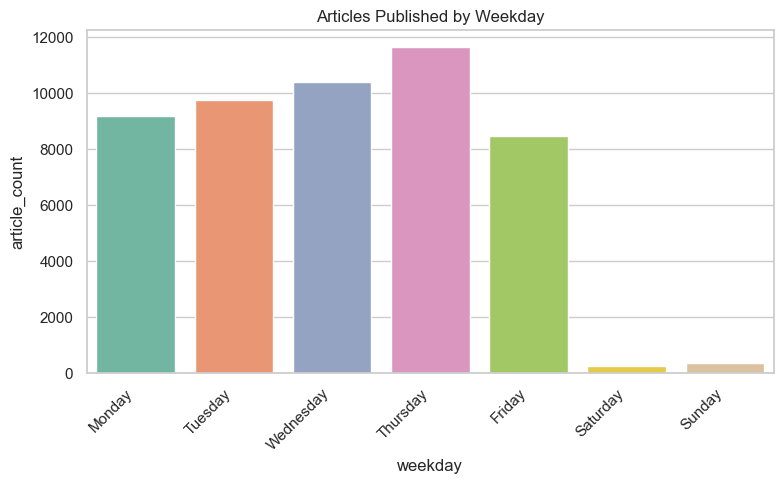

In [39]:
# Count articles per weekday
df_clean['weekday'] = df_clean['date'].dt.day_name()
weekday_counts = df_clean['weekday'].value_counts()
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_counts = weekday_counts.reindex(weekday_order)

weekday_df = weekday_counts.reset_index()
weekday_df.columns = ['weekday', 'article_count']

plot_utils = PlotUtils(weekday_df)
plot_utils.bar(x_col='weekday', y_col='article_count', title='Articles Published by Weekday')

### Hour-of-Day Trends

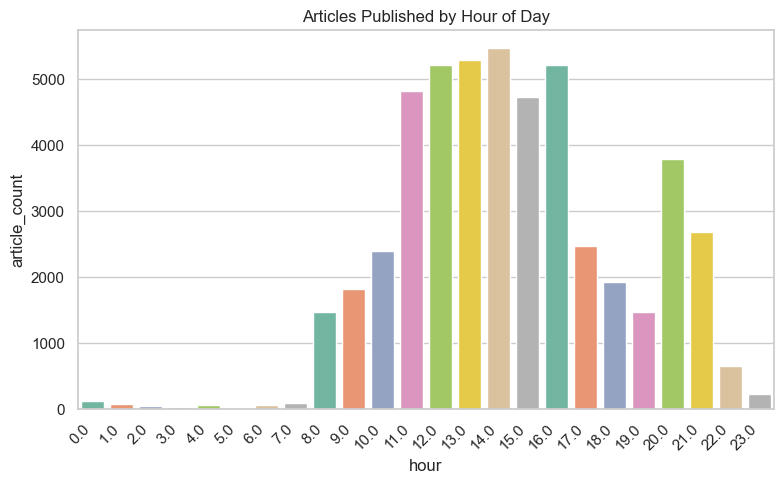

In [40]:
# Count articles per hour
df_clean['hour'] = df_clean['date'].dt.hour
hour_counts = df_clean['hour'].value_counts().sort_index()

hour_df = hour_counts.reset_index()
hour_df.columns = ['hour', 'article_count']

plot_utils = PlotUtils(hour_df)
plot_utils.bar(x_col='hour', y_col='article_count', title='Articles Published by Hour of Day')


### Stock-Specific Trends

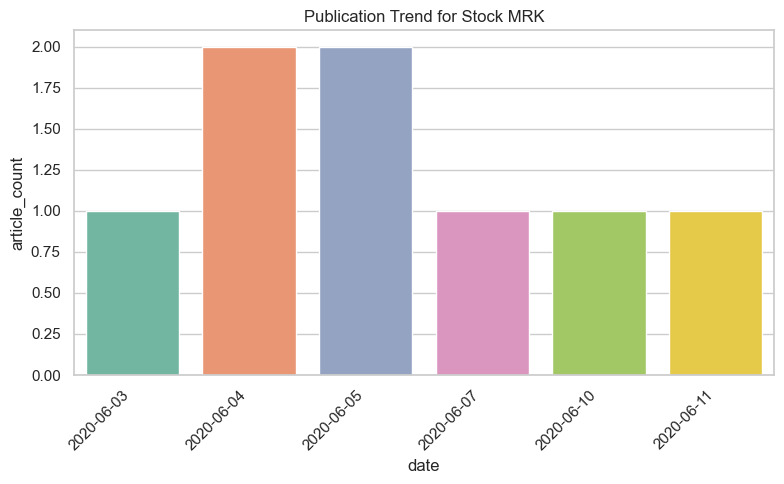

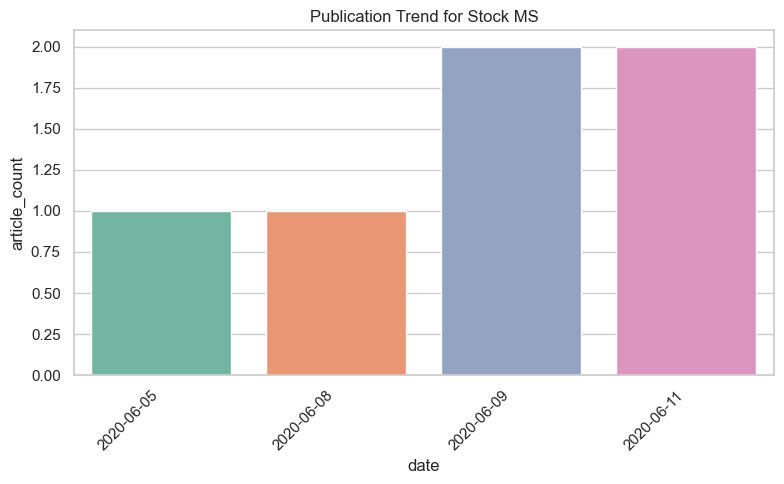

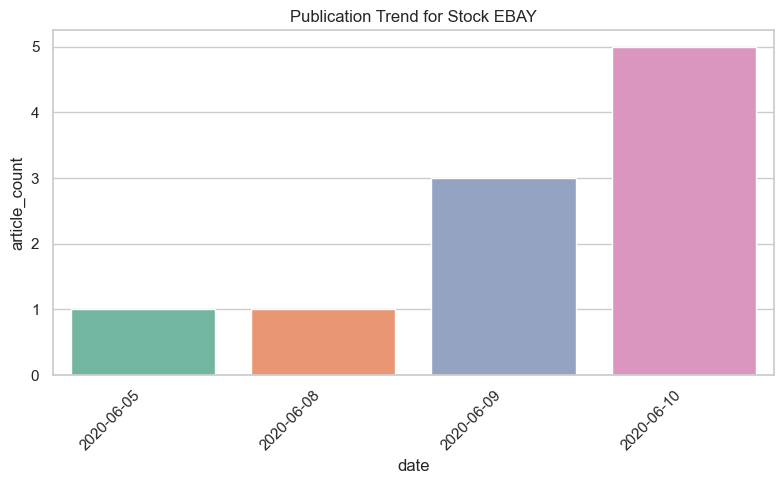

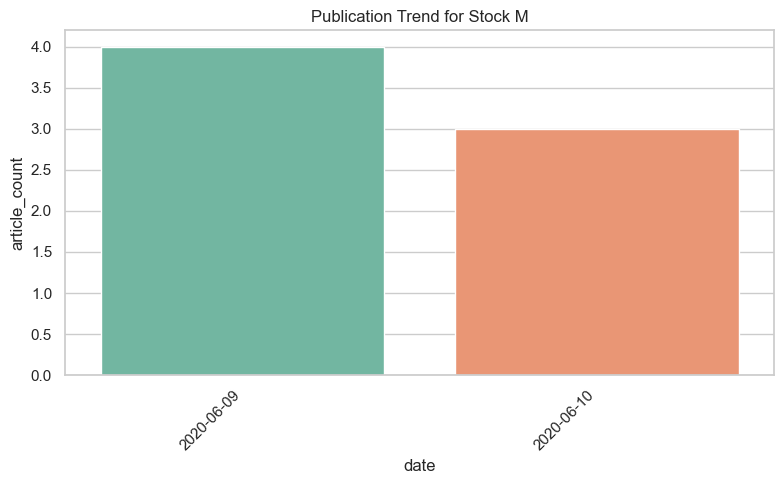

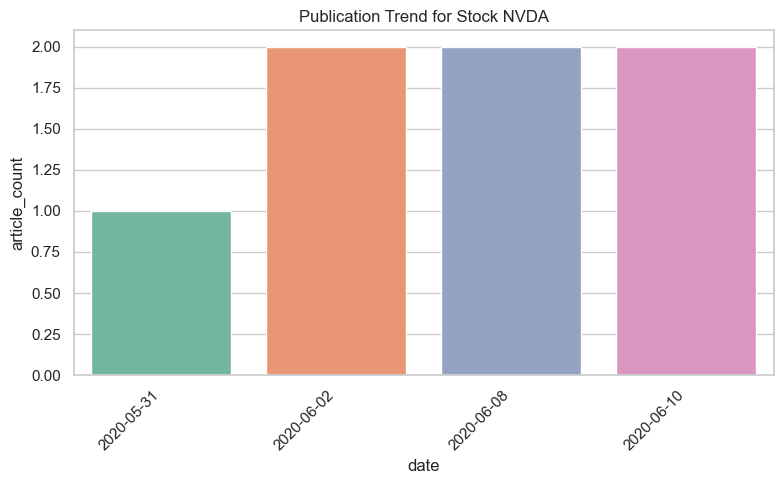

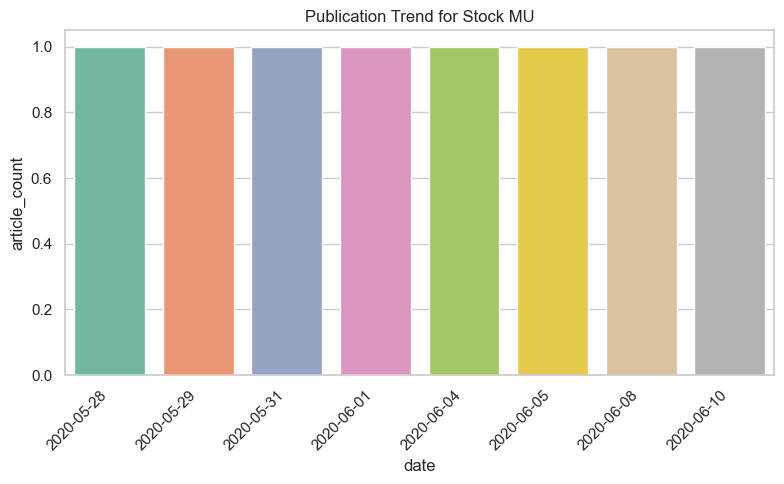

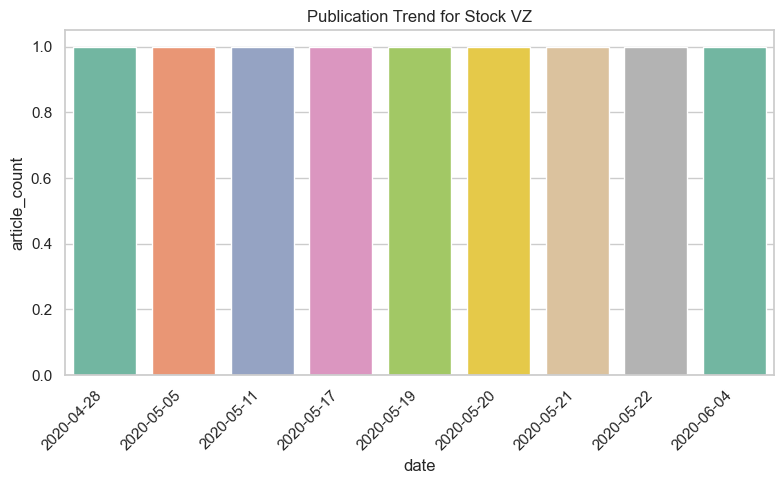

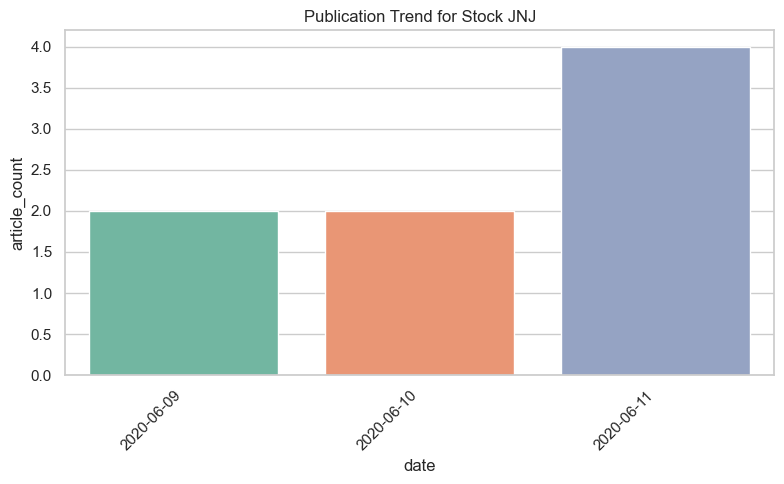

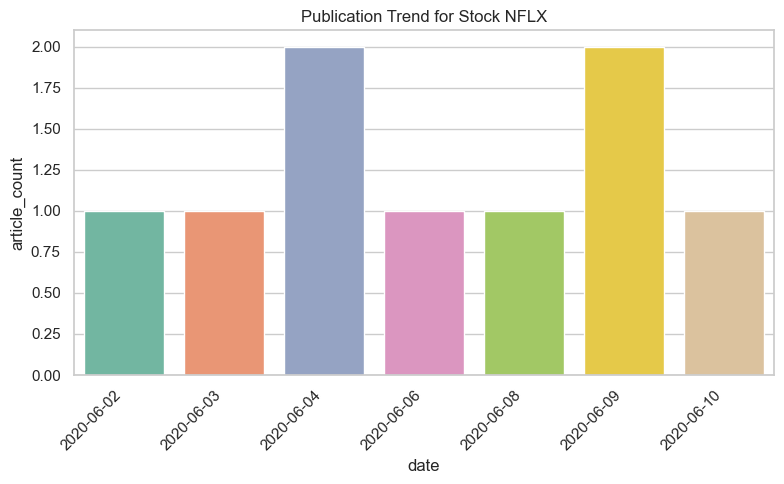

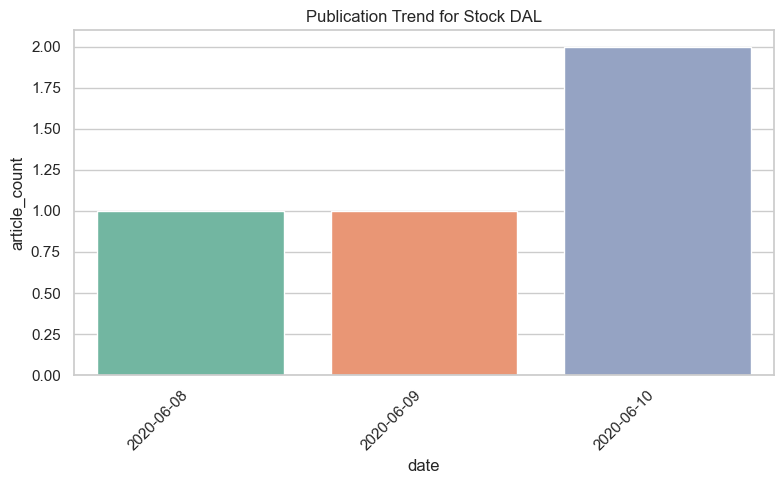

In [41]:
# Count articles per stock
stock_counts = df_clean['stock'].value_counts().head(10)  # top 10 stocks
top_stocks = stock_counts.index.tolist()

# Plot trends for each of the top 10 stocks
for stock in top_stocks:
    stock_df = df_clean[df_clean['stock'] == stock].groupby(df_clean['date'].dt.date)['headline'].count().reset_index()
    stock_df.columns = ['date', 'article_count']
    
    plot_utils = PlotUtils(stock_df)
    plot_utils.bar(
        x_col='date', 
        y_col='article_count', 
        title=f'Publication Trend for Stock {stock}'
    )


### Yearly Publication Counts

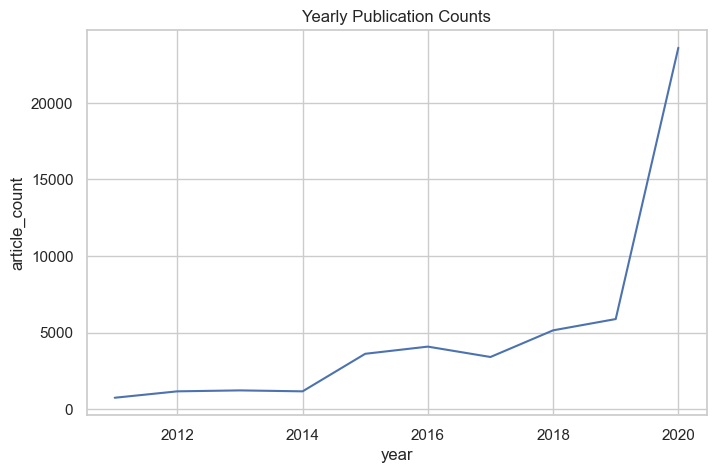

In [42]:
# Extract the year from the date
df_clean['year'] = df_clean['date'].dt.year

# Count articles per year
yearly_counts = df_clean.groupby('year')['headline'].count().reset_index()
yearly_counts.columns = ['year', 'article_count']

# Use PlotUtils to plot a line chart
plot_utils = PlotUtils(yearly_counts)
plot_utils.line(
    x_col='year',
    y_col='article_count',
    title='Yearly Publication Counts'
)
